<a href="https://colab.research.google.com/github/Vineethreddybala12/day5/blob/main/day5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Preview:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


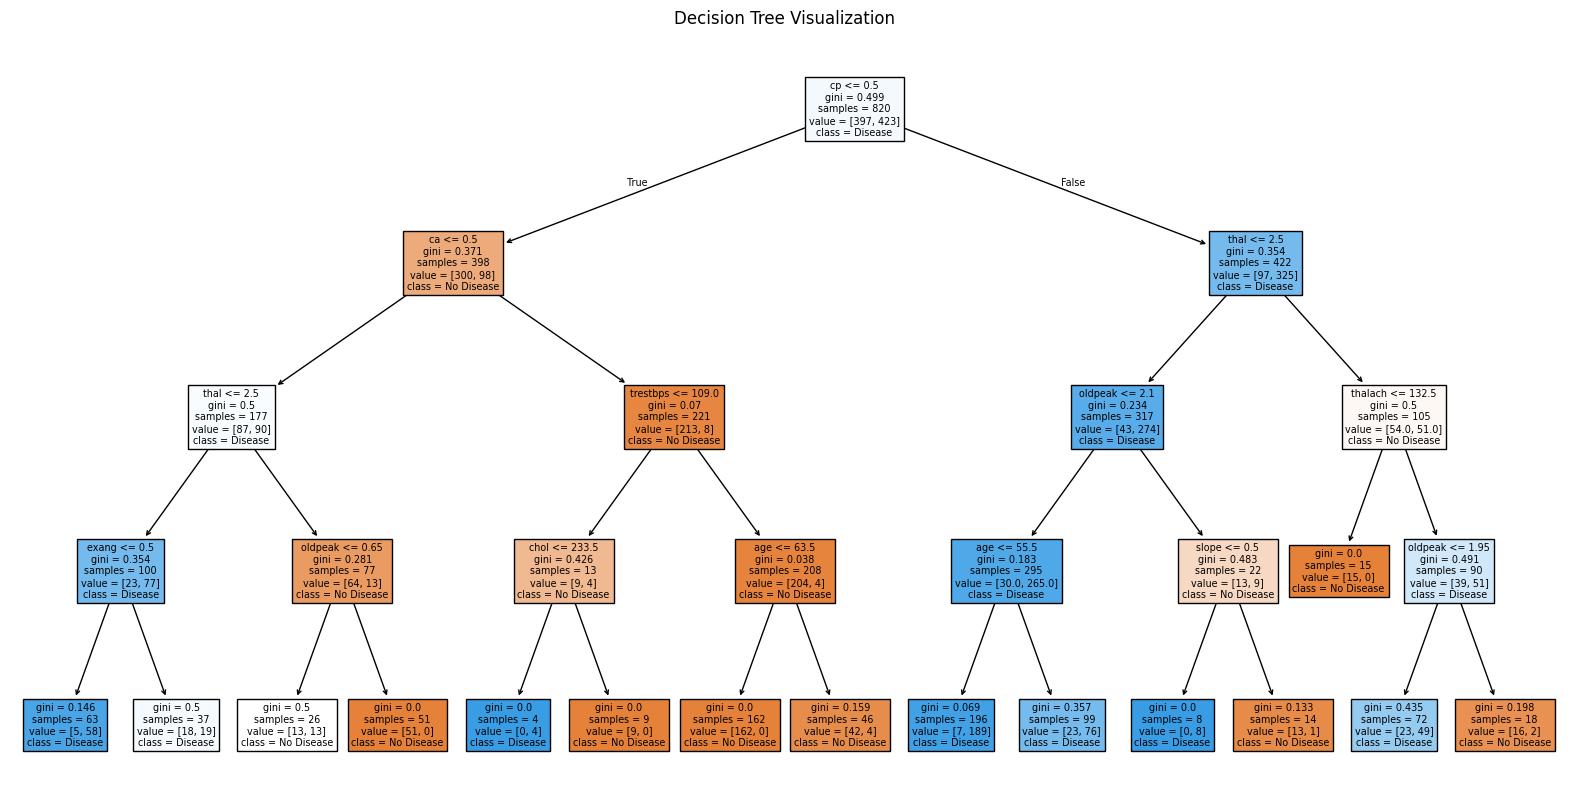


Decision Tree Accuracy -> Train: 0.88, Test: 0.80

Random Forest Accuracy: 0.99


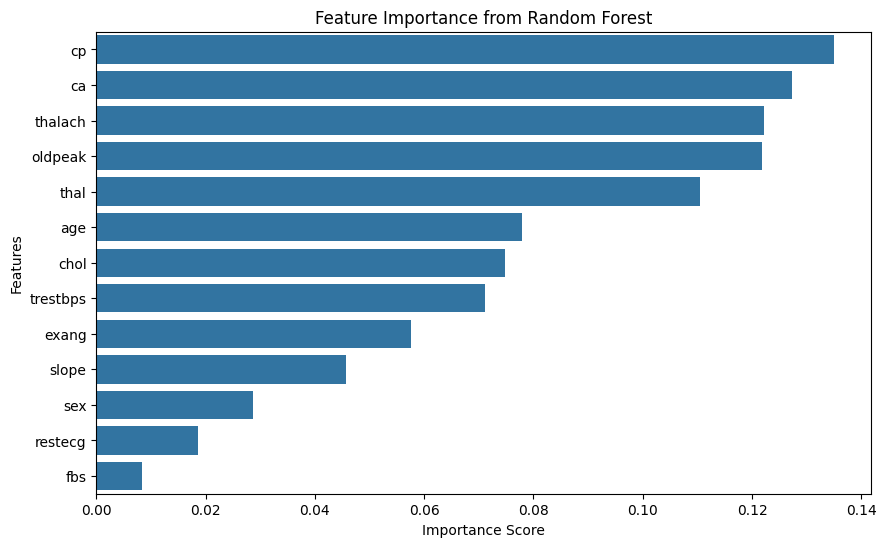


Random Forest 5-Fold CV Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



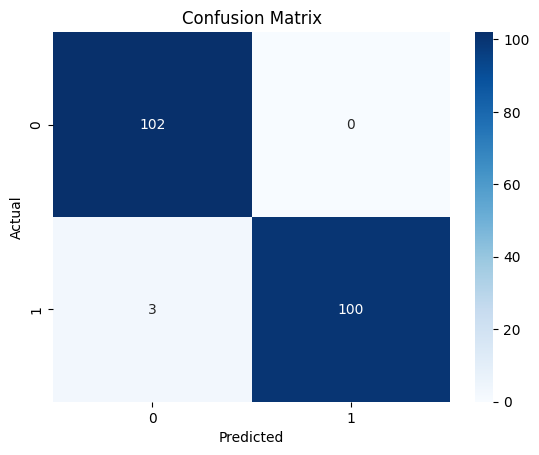

In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

# Load the dataset
df = pd.read_csv('Heart_disease_dataset.csv')

# Display first few rows
print("Dataset Preview:")
print(df.head())

# Check for null values
print("\nMissing Values:")
print(df.isnull().sum())

# Feature and Target
X = df.drop('target', axis=1)
y = df['target']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Train a Decision Tree Classifier
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

# Visualize the tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=["No Disease", "Disease"])
plt.title("Decision Tree Visualization")
plt.show()

# 2. Analyze overfitting
train_acc = dt_model.score(X_train, y_train)
test_acc = dt_model.score(X_test, y_test)
print(f"\nDecision Tree Accuracy -> Train: {train_acc:.2f}, Test: {test_acc:.2f}")

# 3. Train a Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Accuracy comparison
rf_accuracy = accuracy_score(y_test, rf_preds)
print(f"\nRandom Forest Accuracy: {rf_accuracy:.2f}")

# 4. Feature Importance
importances = rf_model.feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

# 5. Cross Validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print(f"\nRandom Forest 5-Fold CV Accuracy: {cv_scores.mean():.2f}")

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, rf_preds))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()